In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
!gdown 1Z3iluHDykJpw08pwCptprRZRWMjY2xkB

Downloading...
From: https://drive.google.com/uc?id=1Z3iluHDykJpw08pwCptprRZRWMjY2xkB
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 22.4MB/s]


In [187]:
aerofit_df = pd.read_csv("aerofit_treadmill.csv")

In [188]:
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [189]:
print(aerofit_df.isna().sum())
print('\n')
print(aerofit_df.head())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [190]:
# Check the shape of the dataset
print("Shape of the dataset:")
print(aerofit_df.shape)
print("\n")

# Check the data types of all the attributes
print("Data types of the attributes:")
print(aerofit_df.dtypes)
print("\n")

# List columns with object data type (potential categorical columns)
print("Categorical columns (object data type):")
print(aerofit_df.select_dtypes(include='object').columns)
print("\n")

# Get a statistical summary of the numeric data
print("Statistical summary of the numeric columns:")
print(aerofit_df.describe())


Shape of the dataset:
(180, 9)


Data types of the attributes:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


Categorical columns (object data type):
Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')


Statistical summary of the numeric columns:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000

In [191]:
# Criteria for picking columns for outliers

# Outlier detection is more meaningful in numerical columns because these values can deviate significantly from the norm.
# Categorical variables (e.g., Gender, MaritalStatus) are less suitable for traditional outlier detection.

# Columns where the mean and median differ significantly are good candidates for outlier analysis.
# This is because when the mean and median are not close to each other, it often indicates that the data is "skewed" or unbalanced.
# Skewness means the data has extreme values (outliers) that pull the average (mean) higher or lower than the middle value (median).

# For example, if the mean is much higher than the median, it suggests that there are extreme high values (outliers) pulling the average up.
# On the other hand, if the mean is much lower than the median, it suggests that there are extreme low values (outliers) pulling the average down.

# We will analyse on these numerical columns for outliers ['Age',	'Education', 'Usage',	'Fitness', 'Income',	'Miles']

In [192]:
numerical_columns = aerofit_df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


In [193]:
Age_Mean = aerofit_df['Age'].mean()
Age_Median = aerofit_df['Age'].median()
print("Age Column Mean: " , Age_Mean)
print("Age Column Median: " , Age_Median)
# The average age is a little higher than the middle value, which means there are some older people in the dataset.
# These older individuals could be outliers.

Age Column Mean:  28.788888888888888
Age Column Median:  26.0


In [194]:
Education_Mean = aerofit_df['Education'].mean()
Education_Median = aerofit_df['Education'].median()
print("Education Column Mean: " , Education_Mean)
print("Education Column Median: " , Education_Median)
# The average education level is very close to the middle value, meaning the education level is pretty balanced.
# It's unlikely there are major outliers here.

Education Column Mean:  15.572222222222223
Education Column Median:  16.0


In [195]:
Usage_Mean = aerofit_df['Usage'].mean()
Usage_Median = aerofit_df['Usage'].median()
print("Usage Column Mean: " , Usage_Mean)
print("Usage Column Median: " , Usage_Median)
# The average usage is slightly higher than the middle value, suggesting some people use the treadmill a lot more than others.
# These heavy users might be outliers.

Usage Column Mean:  3.4555555555555557
Usage Column Median:  3.0


In [196]:
Fitness_Mean = aerofit_df['Fitness'].mean()
Fitness_Median = aerofit_df['Fitness'].median()
print("Fitness Column Mean: " , Fitness_Mean)
print("Fitness Column Median: " , Fitness_Median)
# The average fitness level is very close to the middle value, meaning most people’s fitness level is about the same.
# The data likely represents a categorical or ordinal scale (e.g., fitness levels rated from 1 to 5).
# There are likely no major outliers here.

Fitness Column Mean:  3.311111111111111
Fitness Column Median:  3.0


In [197]:
Income_Mean = aerofit_df['Income'].mean()
Income_Median = aerofit_df['Income'].median()
print("Income Column Mean: " , Income_Mean)
print("Income Column Median: " , Income_Median)
# The average income is much higher than the middle value, which means there are a few people with very high incomes.
# These high earners could be outliers, pushing up the average.

Income Column Mean:  53719.57777777778
Income Column Median:  50596.5


In [198]:
Miles_Mean = aerofit_df['Miles'].mean()
Miles_Median = aerofit_df['Miles'].median()
print("Miles Column Mean: " , Miles_Mean)
print("Miles Column Median: " , Miles_Median)
# The average miles run is higher than the middle value, suggesting some people run a lot more than others.
# These long-distance runners could be outliers.

Miles Column Mean:  103.19444444444444
Miles Column Median:  94.0


In [199]:
# Based on the above analysis, we selected the following columns for outlier detection: ['Age', 'Usage', 'Income',	'Miles']

In [200]:
# 25th percentile or Q1
p_25 = np.percentile(aerofit_df["Age"], 25)
print("25% percentile: ", p_25)

25% percentile:  24.0


In [201]:
#50th percentile or Q2, also "Median"
p_50 = np.percentile(aerofit_df["Age"], 50)
print("50% percentile: ", p_50)

50% percentile:  26.0


In [202]:
#75th percentile or Q3
p_75 = np.percentile(aerofit_df["Age"], 75)
print("75% percentile: ", p_75)

75% percentile:  33.0


In [203]:
# Inter Quartile Range
iqr_Age = p_75 - p_25
print("Inter Quartile Range (IQR):", iqr_Age)

Inter Quartile Range (IQR): 9.0


In [204]:
normal_range = (aerofit_df["Age"].max() - aerofit_df["Age"].min())
print("normal_range: ", normal_range)

normal_range:  32


In [205]:
# Observations:
# - The IQR (9.0) shows that the middle 50% of the data lies within a much narrower range.
# - The normal range (32) is significantly larger, indicating the presence of extreme values (outliers).
# - IQR is a better indicator of typical values in the dataset since it is less affected by outliers.

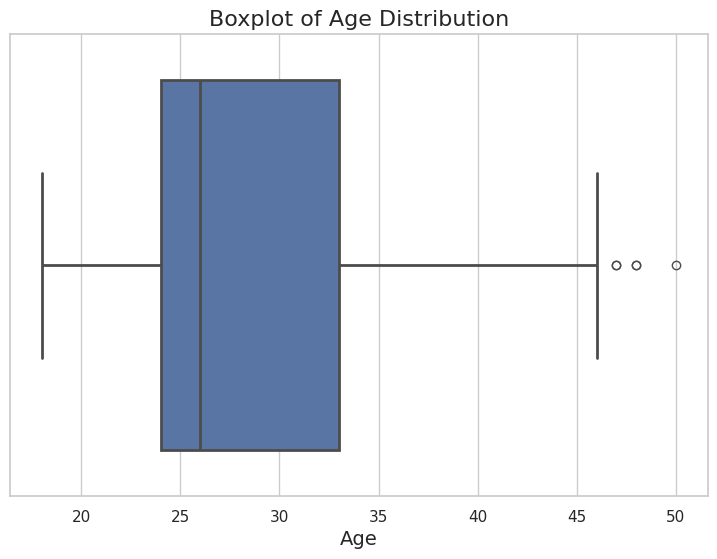

In [206]:
# Set up the figure with a larger size
plt.figure(figsize=(9, 6))

# Create the boxplot with horizontal orientation
sns.boxplot(data=aerofit_df["Age"], orient="h", linewidth=2)

# Add labels and title for better clarity
plt.title('Boxplot of Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Show the plot
plt.show()

In [207]:
# lower limit = Q1 - 1.5 * IQR
lower = p_25 - (1.5 * iqr_Age)
print("lower limit : ", lower)
# upper limit = Q3 + 1.5 * IQR
upper = p_75 + (1.5* iqr_Age)
print("upper limit : ", upper)

lower limit :  10.5
upper limit :  46.5


In [208]:
# all the values greater than upper is outlier
upper_outliers_age = aerofit_df[aerofit_df["Age"]>upper]
print("Total Outlier greater than upper limit : ", len(upper_outliers_age))

# all the values greater than upper is outlier
lower_outliers_age = aerofit_df[aerofit_df["Age"]<lower]
print("Total Outlier less than lower limit : ", len(lower_outliers_age))

Total Outlier greater than upper limit :  5
Total Outlier less than lower limit :  0


In [209]:
# Here we observe that about 2.7% (or roughly 3%) of the ages in the dataset are outliers.
# This means that 2.7% of the time, the Age values fall outside the normal range, which is defined by the IQR (9).
total_count = aerofit_df['Age'].count()
Age_outlier_percentage = ((len(upper_outliers_age) + len(lower_outliers_age)) / total_count) * 100
print(f"Usage Column Outlier Percentage: {Age_outlier_percentage}%")

Usage Column Outlier Percentage: 2.7777777777777777%


In [210]:
# 25th percentile or Q1
p_25 = np.percentile(aerofit_df["Usage"], 25)
print("25% percentile: ", p_25)

#50th percentile or Q2, also "Median"
p_50 = np.percentile(aerofit_df["Usage"], 50)
print("50% percentile: ", p_50)

#75th percentile or Q3
p_75 = np.percentile(aerofit_df["Usage"], 75)
print("75% percentile: ", p_75)

# Inter Quartile Range
iqr_Usage = p_75 - p_25
print("Inter Quartile Range (IQR):", iqr_Usage)

# normal range
normal_range = (aerofit_df["Usage"].max() - aerofit_df["Usage"].min())
print("normal_range: ", normal_range)

# lower limit = Q1 - 1.5 * IQR
lower = p_25 - (1.5 * iqr_Usage)
print("lower limit : ", lower)
# upper limit = Q3 + 1.5 * IQR
upper = p_75 + (1.5 * iqr_Usage)
print("upper limit : ", upper)

# all the values greater than upper is outlier
upper_outliers_usage = aerofit_df[aerofit_df["Usage"] > upper]
print("Total Outlier greater than upper limit : ", len(upper_outliers_usage))

# all the values greater than upper is outlier
lower_outliers_usage = aerofit_df[aerofit_df["Usage"] < lower]
print("Total Outlier less than lower limit : ", len(lower_outliers_usage))

# Here we observe that about 5% of the usage in the dataset are outliers.
# This means that 5% of the time, the Usage values fall outside the normal range, which is defined by the IQR (1).
total_count = aerofit_df['Usage'].count()
Usage_outlier_percentage = ((len(upper_outliers_usage) + len(lower_outliers_usage)) / total_count) * 100
print(f"Usage Column Outlier Percentage: {Usage_outlier_percentage}%")

25% percentile:  3.0
50% percentile:  3.0
75% percentile:  4.0
Inter Quartile Range (IQR): 1.0
normal_range:  5
lower limit :  1.5
upper limit :  5.5
Total Outlier greater than upper limit :  9
Total Outlier less than lower limit :  0
Usage Column Outlier Percentage: 5.0%


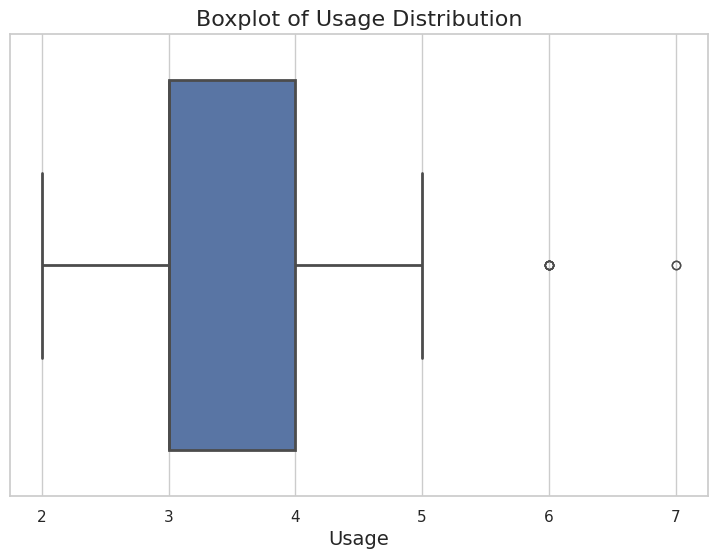

In [211]:
# Set up the figure with a larger size
plt.figure(figsize=(9, 6))

# Create the boxplot with horizontal orientation
sns.boxplot(data=aerofit_df["Usage"], orient="h", linewidth=2)

# Add labels and title for better clarity
plt.title('Boxplot of Usage Distribution', fontsize=16)
plt.xlabel('Usage', fontsize=14)

# Show the plot
plt.show()

In [212]:
# 25th percentile or Q1
p_25 = np.percentile(aerofit_df["Income"], 25)
print("25% percentile: ", p_25)

#50th percentile or Q2, also "Median"
p_50 = np.percentile(aerofit_df["Income"], 50)
print("50% percentile: ", p_50)

#75th percentile or Q3
p_75 = np.percentile(aerofit_df["Income"], 75)
print("75% percentile: ", p_75)

# Inter Quartile Range
iqr_Income= p_75 - p_25
print("Inter Quartile Range (IQR):", iqr_Income)

# normal range
normal_range = (aerofit_df["Income"].max() - aerofit_df["Income"].min())
print("normal_range: ", normal_range)

# lower limit = Q1 - 1.5 * IQR
lower = p_25 - (1.5 * iqr_Income)
print("lower limit : ", lower)
# upper limit = Q3 + 1.5 * IQR
upper = p_75 + (1.5 * iqr_Income)
print("upper limit : ", upper)

# all the values greater than upper is outlier
upper_outliers_income = aerofit_df[aerofit_df["Income"] > upper]
print("Total Outlier greater than upper limit : ", len(upper_outliers_income))

# all the values greater than upper is outlier
lower_outliers_income = aerofit_df[aerofit_df["Income"] < lower]
print("Total Outlier less than lower limit : ", len(lower_outliers_income))

# Here we observe that about 10.55% of the income in the dataset are outliers.
# This means that 10.55% of the time, the Income values fall outside the normal range, which is defined by the IQR (14609.25).
total_count = aerofit_df['Income'].count()
Income_outlier_percentage = ((len(upper_outliers_income) + len(lower_outliers_income)) / total_count) * 100
print(f"Income Column Outlier Percentage: {Income_outlier_percentage}%")

25% percentile:  44058.75
50% percentile:  50596.5
75% percentile:  58668.0
Inter Quartile Range (IQR): 14609.25
normal_range:  75019
lower limit :  22144.875
upper limit :  80581.875
Total Outlier greater than upper limit :  19
Total Outlier less than lower limit :  0
Income Column Outlier Percentage: 10.555555555555555%


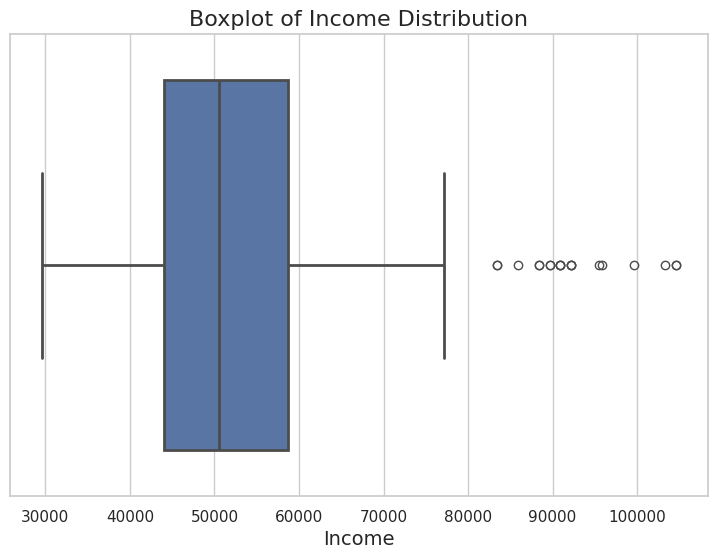

In [213]:
# Set up the figure with a larger size
plt.figure(figsize=(9, 6))

# Create the boxplot with horizontal orientation
sns.boxplot(data=aerofit_df["Income"], orient="h", linewidth=2)

# Add labels and title for better clarity
plt.title('Boxplot of Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)

# Show the plot
plt.show()

In [214]:
# 25th percentile or Q1
p_25 = np.percentile(aerofit_df["Miles"], 25)
print("25% percentile: ", p_25)

#50th percentile or Q2, also "Median"
p_50 = np.percentile(aerofit_df["Miles"], 50)
print("50% percentile: ", p_50)

#75th percentile or Q3
p_75 = np.percentile(aerofit_df["Miles"], 75)
print("75% percentile: ", p_75)

# Inter Quartile Range
iqr_Miles = p_75 - p_25
print("Inter Quartile Range (IQR):", iqr_Miles)

# normal range
normal_range = (aerofit_df["Miles"].max() - aerofit_df["Miles"].min())
print("normal_range: ", normal_range)

# lower limit = Q1 - 1.5 * IQR
lower = p_25 - (1.5 * iqr_Miles)
print("lower limit : ", lower)
# upper limit = Q3 + 1.5 * IQR
upper = p_75 + (1.5 * iqr_Miles)
print("upper limit : ", upper)

# all the values greater than upper is outlier
upper_outliers_miles = aerofit_df[aerofit_df["Miles"] > upper]
print("Total Outlier greater than upper limit : ", len(upper_outliers_miles))

# all the values greater than upper is outlier
lower_outliers_miles = aerofit_df[aerofit_df["Miles"] < lower]
print("Total Outlier less than lower limit : ", len(lower_outliers_miles))

# Here we observe that about 7.22% of the usage in the dataset are outliers.
# This means that 7.22% of the time, the Miles values fall outside the normal range, which is defined by the IQR (48.75).
total_count = aerofit_df['Miles'].count()
Miles_outlier_percentage = ((len(upper_outliers_miles) + len(lower_outliers_miles)) / total_count) * 100
print(f"Miles Column Outlier Percentage: {Miles_outlier_percentage}%")

25% percentile:  66.0
50% percentile:  94.0
75% percentile:  114.75
Inter Quartile Range (IQR): 48.75
normal_range:  339
lower limit :  -7.125
upper limit :  187.875
Total Outlier greater than upper limit :  13
Total Outlier less than lower limit :  0
Miles Column Outlier Percentage: 7.222222222222221%


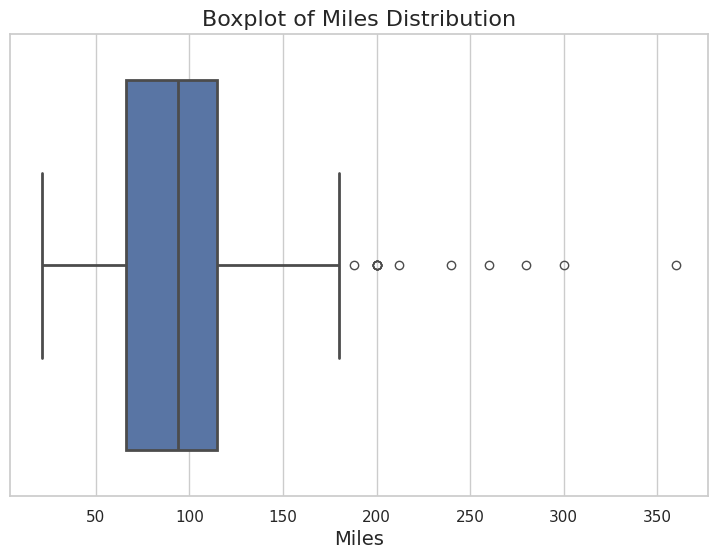

In [215]:
# Set up the figure with a larger size
plt.figure(figsize=(9, 6))

# Create the boxplot with horizontal orientation
sns.boxplot(data=aerofit_df["Miles"], orient="h", linewidth=2)

# Add labels and title for better clarity
plt.title('Boxplot of Miles Distribution', fontsize=16)
plt.xlabel('Miles', fontsize=14)

# Show the plot
plt.show()

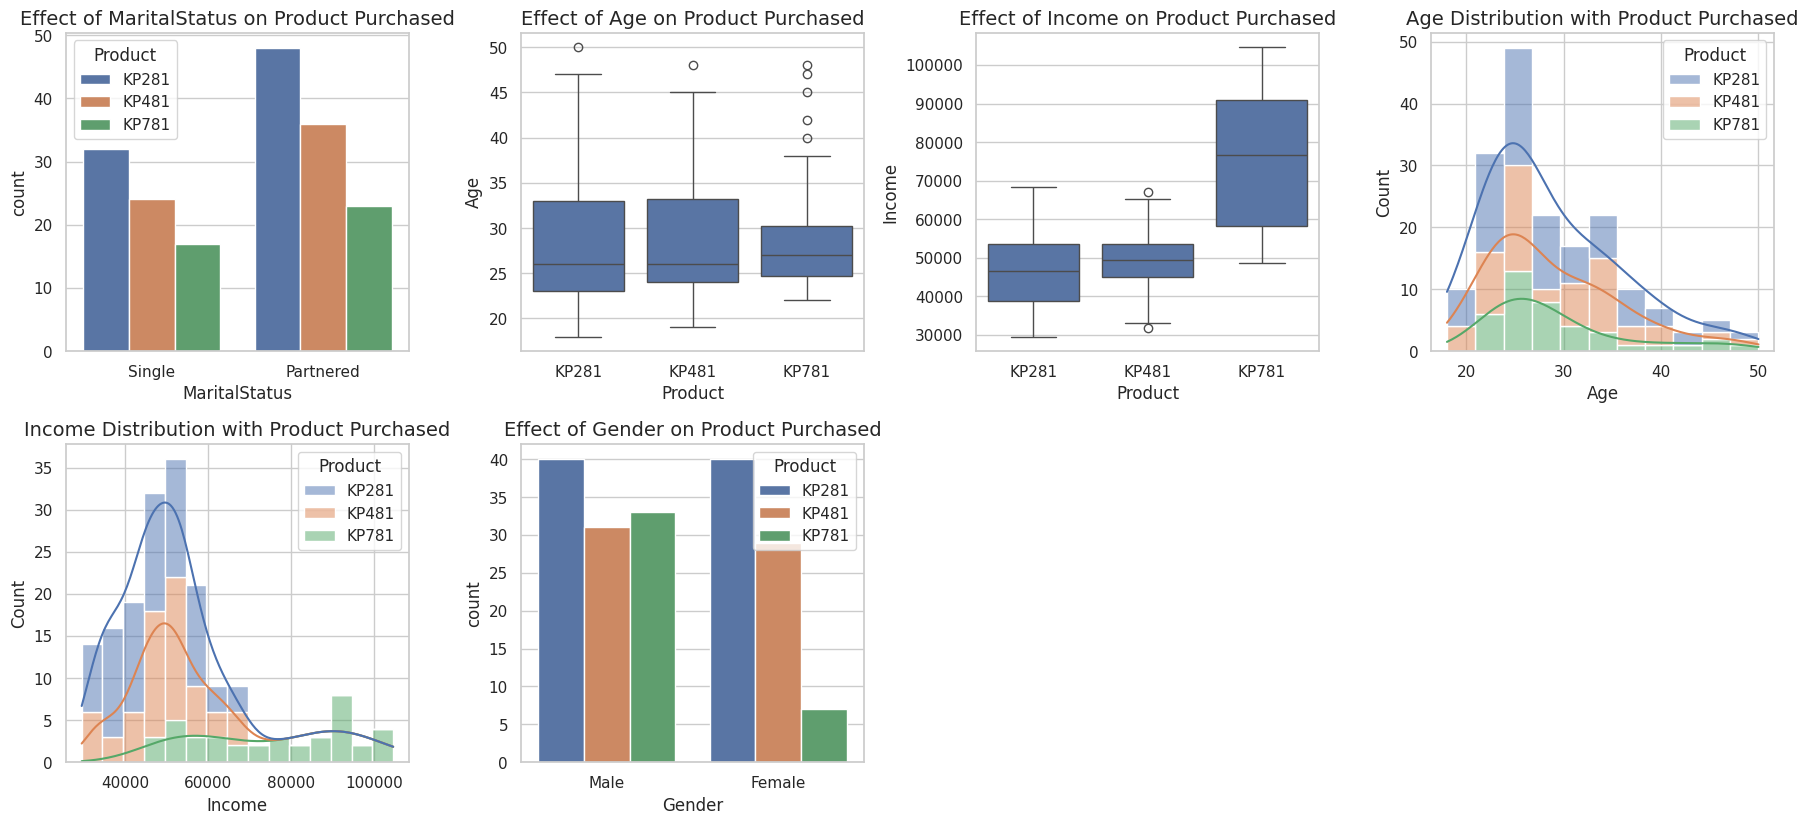

In [216]:
# Set up the figure and axes
fig = plt.figure(figsize=(18, 12))

# First subplot: Countplot to see the effect of MaritalStatus (Categorical) on Product Purchased (Categorical)
plt.subplot(3, 4, 1)
sns.countplot(data=aerofit_df, x='MaritalStatus', hue='Product')
plt.title('Effect of MaritalStatus on Product Purchased', fontsize=14)
# Insight: Partnered individuals prefer KP281 the most, while singles are split between KP281 and KP481.
# Range: MaritalStatus has two categories - Single and Partnered.
# Recommendations: Market KP281 as a family-friendly product to attract partnered customers.

# Second subplot: Boxplot to visualize the effect of Age (Continuous) on Product Purchased (Categorical)
plt.subplot(3, 4, 2)
sns.boxplot(data=aerofit_df, x='Product', y='Age')
plt.title('Effect of Age on Product Purchased', fontsize=14)
# Insight: KP281 and KP481 are popular among younger customers (20-35 age group).
# Range: Age varies approximately from 20 to 50 years across products.
# Recommendations: Focus marketing strategies for KP281/KP481 on younger audiences via social media and digital campaigns.

# Third subplot: Boxplot to visualize the effect of Income (Continuous) on Product Purchased (Categorical)
plt.subplot(3, 4, 3)
sns.boxplot(data=aerofit_df, x='Product', y='Income')
plt.title('Effect of Income on Product Purchased', fontsize=14)
# Insight: KP781 is purchased more by high-income customers, while KP281/KP481 appeal to middle-income buyers.
# Range: Income spans from 30,000 to over 100,000, with KP781 skewing toward higher incomes.
# Recommendations: Position KP781 as a premium product and emphasize its high-end features.

# Fourth subplot: Histplot to visualize Age (Continuous) distribution with Product Purchased (Categorical)
plt.subplot(3, 4, 4)
sns.histplot(data=aerofit_df, x='Age', hue='Product', kde=True, multiple='stack')
plt.title('Age Distribution with Product Purchased', fontsize=14)
# Insight: Most buyers fall within the 20-30 age group, particularly for KP281.
# Range: Age distribution highlights a peak around 25 years for KP281 and KP481.
# Recommendations: Target this age group with youth-oriented campaigns and offers.

# Fifth subplot: Histplot to visualize Income (Continuous) distribution with Product Purchased (Categorical)
plt.subplot(3, 4, 5)
sns.histplot(data=aerofit_df, x='Income', hue='Product', kde=True, multiple='stack')
plt.title('Income Distribution with Product Purchased', fontsize=14)
# Insight: KP281 and KP481 are popular among individuals with incomes between 40,000-60,000.
# Range: Income distribution peaks around 50,000 for KP281 and KP481.
# Recommendations: Focus on affordability and provide discounts or EMI options to attract this segment.

# Sixth subplot: Countplot to see the effect of Gender (Categorical) on Product Purchased (Categorical)
plt.subplot(3, 4, 6)
sns.countplot(data=aerofit_df, x='Gender', hue='Product')
plt.title('Effect of Gender on Product Purchased', fontsize=14)
# Insight: KP281 appeals to both genders equally, while KP781 has a male bias.
# Range: Gender has two categories - Male and Female.
# Recommendations: Market KP281 as a gender-neutral product and refine KP781 to attract female buyers.

# Apply tight_layout for better spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [217]:
# Filter the data for specific products, e.g., KP281, KP481, KP781
# Create a new column indicating if the customer bought one of the specified products
specific_products = ['KP281', 'KP481', 'KP781']
aerofit_df['ProductPurchased'] = aerofit_df['Product'].apply(lambda x: x if x in specific_products else 'Other')

# Create a crosstab to count how many customers purchased each product
product_counts = pd.crosstab(aerofit_df['ProductPurchased'], columns='Count')

# Calculate the percentage of customers who bought each product
product_percentage = product_counts / product_counts.sum() * 100

print("Percentage of customers who purchased KP281, KP481, or KP781:")
print(product_percentage)


Percentage of customers who purchased KP281, KP481, or KP781:
col_0                 Count
ProductPurchased           
KP281             44.444444
KP481             33.333333
KP781             22.222222


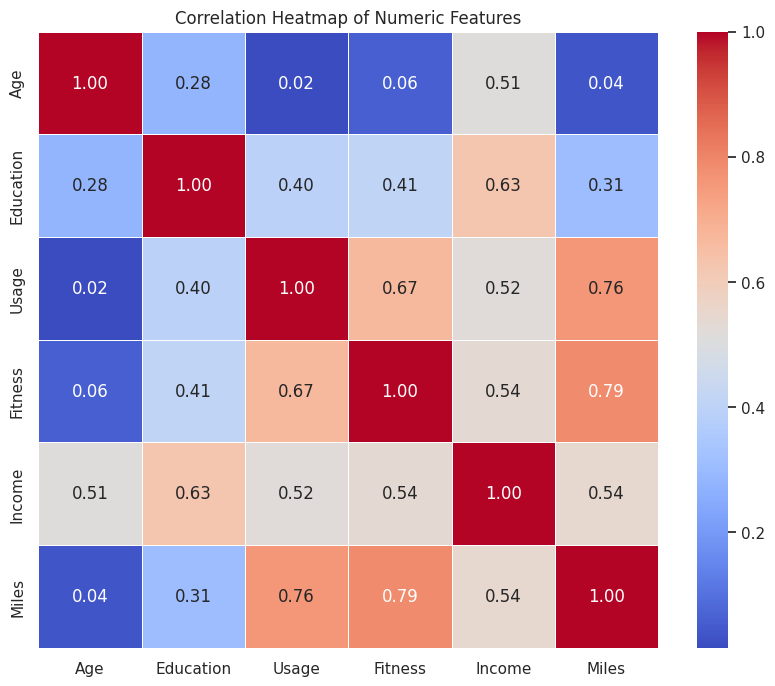

In [218]:
# Calculate the correlation matrix
correlation_matrix = aerofit_df[aerofit_df.select_dtypes(include='number').columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

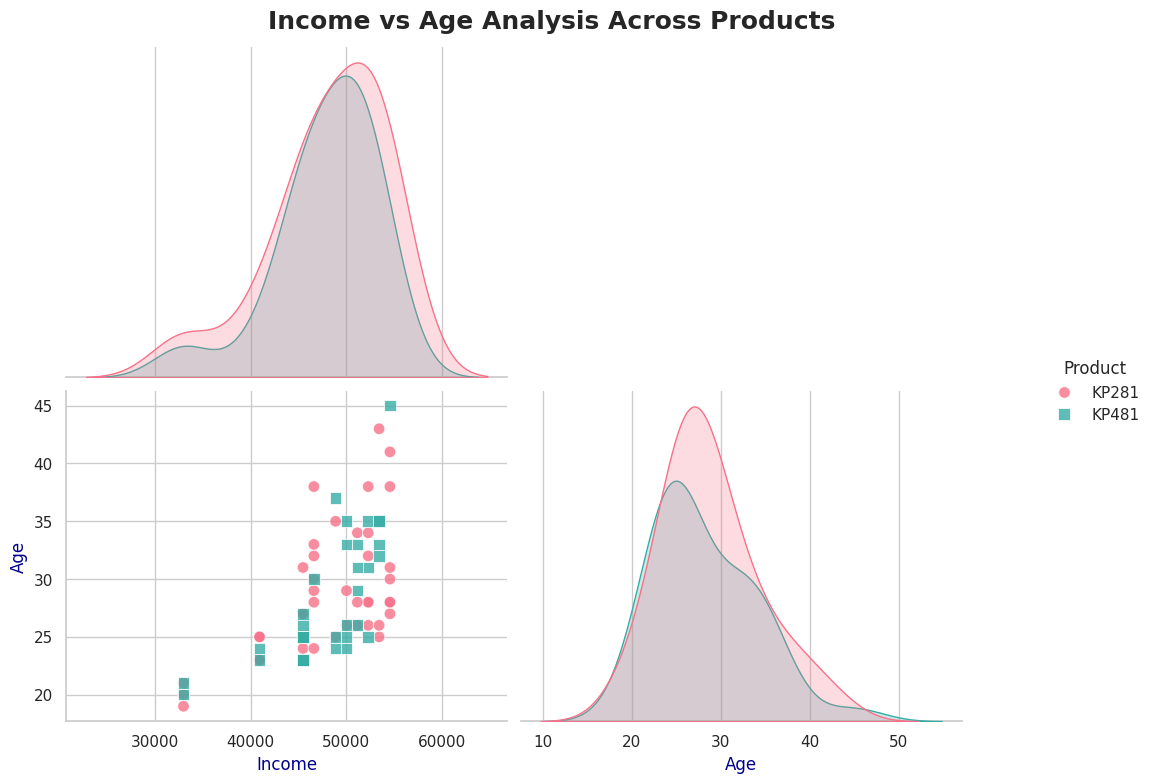

Income Statistics by Product:
         count          mean          std      min      25%      50%      75%  \
Product                                                                         
KP281     42.0  48187.142857  5974.113644  32973.0  45480.0  49459.5  52302.0   
KP481     34.0  47954.647059  5195.107826  32973.0  45480.0  49459.5  51165.0   

             max  
Product           
KP281    54576.0  
KP481    54576.0  

Age Statistics by Product:
         count       mean       std   min    25%   50%    75%   max
Product                                                            
KP281     42.0  28.809524  5.438069  19.0  25.00  28.0  31.75  43.0
KP481     34.0  28.205882  5.547478  20.0  24.25  26.0  32.75  45.0


In [219]:
# Select top 'Income' and 'Usage' ranges for filtering
top_10_income = aerofit_df['Income'].value_counts().index[:10]
top_3_usage = aerofit_df['Usage'].value_counts().index[:3]

# Filter the data for top income and usage categories
filtered_data = aerofit_df[
    (aerofit_df['Income'].isin(top_10_income)) &
    (aerofit_df['Usage'].isin(top_3_usage))
]

# Generate a Pairplot: Income vs Age with Product differentiation
g = sns.pairplot(
    data=filtered_data,
    vars=['Income', 'Age'],
    hue='Product',
    palette='husl',
    markers=["o", "s"],
    plot_kws={'alpha': 0.8, 's': 70},
    diag_kws={'fill': True, 'bw_adjust': 1.2},
    height=2.5,
    aspect=1.3,
    corner=True
)

# Add customizations for clarity
g.fig.set_size_inches(12, 8)
g.fig.suptitle("Income vs Age Analysis Across Products", y=1.02, fontsize=18, fontweight='bold')

# Add insights to the figure by iterating axes
for ax in g.axes.flatten():
    if ax:  # Avoid empty plots
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)
        ax.xaxis.label.set_color('darkblue')
        ax.yaxis.label.set_color('darkblue')

# Display the pairplot
plt.show()

# High-level statistical summaries for business insights
print("Income Statistics by Product:")
income_summary = filtered_data.groupby('Product')['Income'].describe()
print(income_summary)

print("\nAge Statistics by Product:")
age_summary = filtered_data.groupby('Product')['Age'].describe()
print(age_summary)

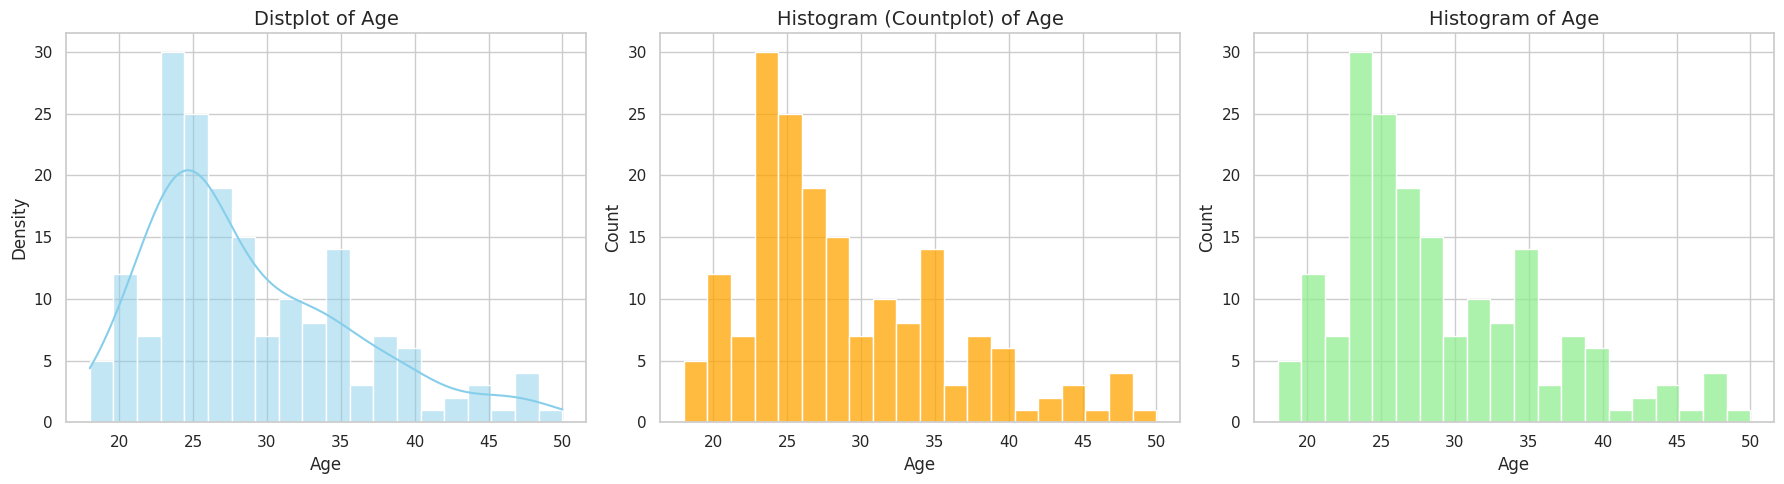

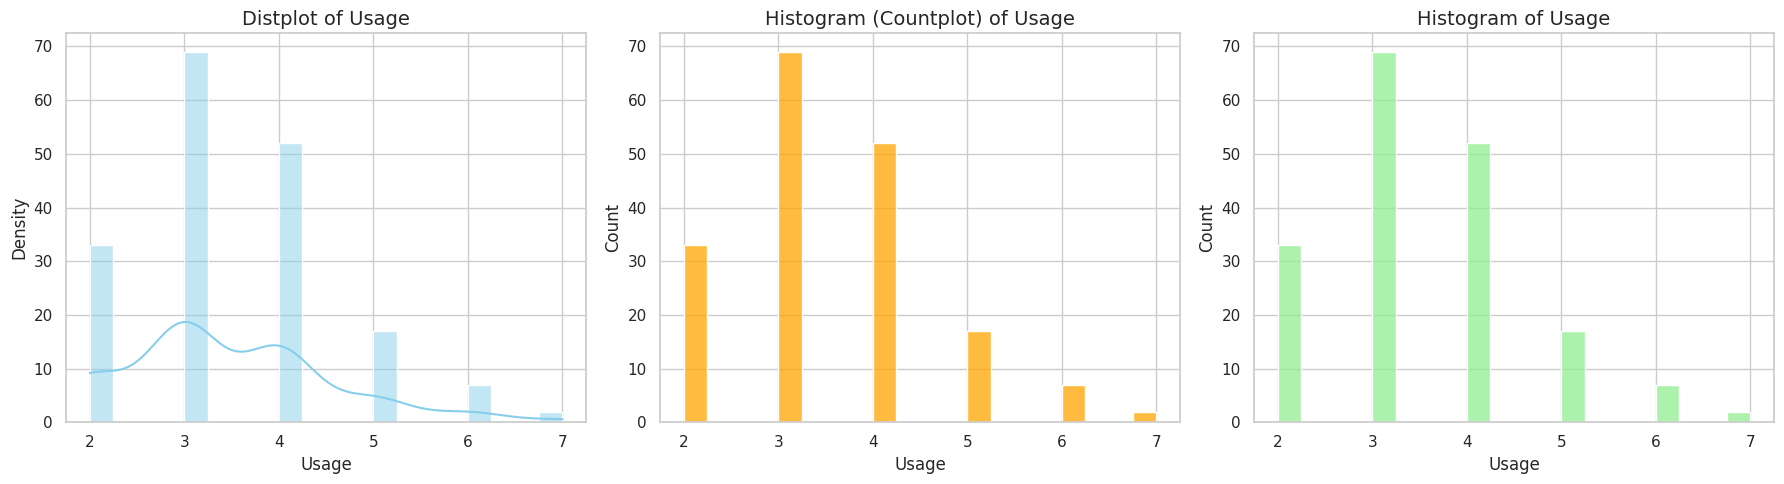

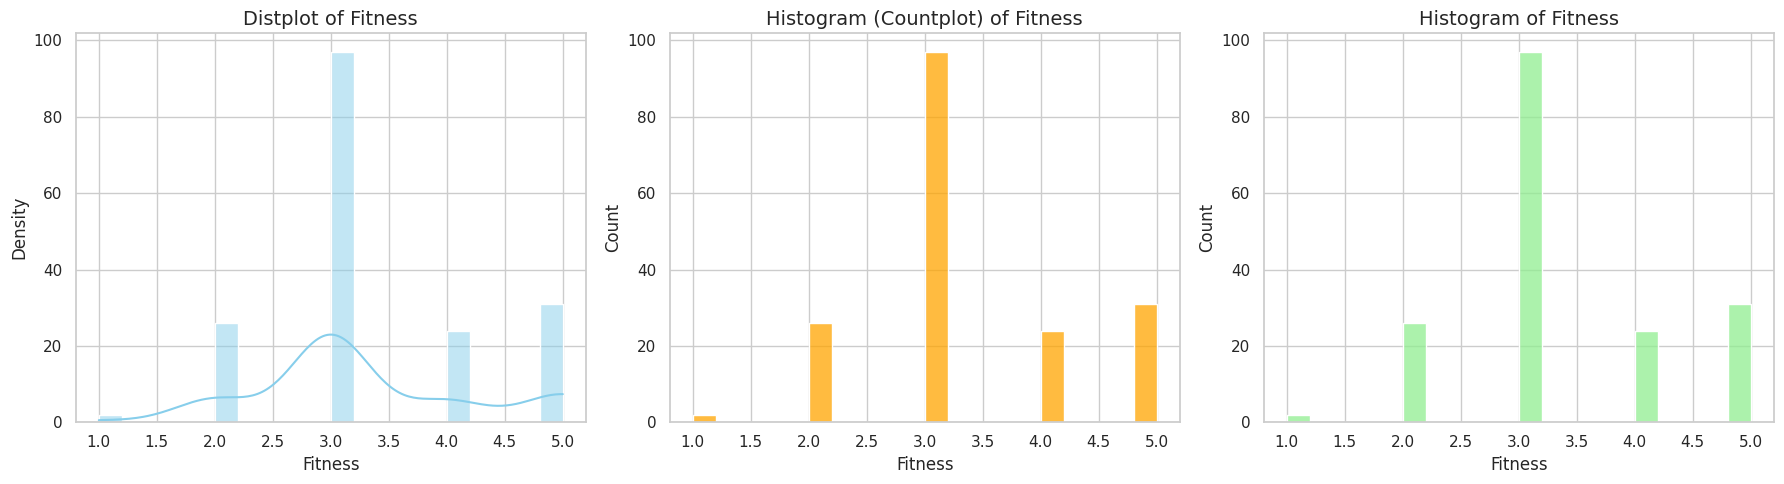

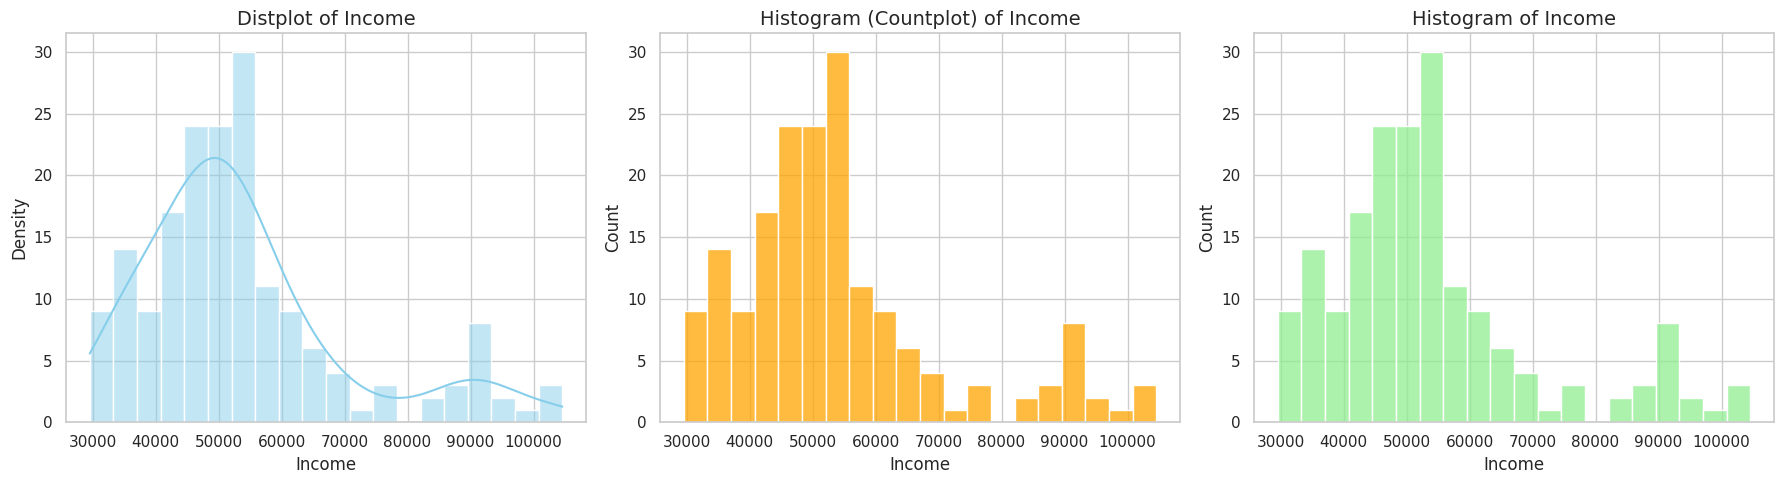

In [220]:
# Univariate Analysis
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Continuous variables for analysis
continuous_vars = ['Age', 'Usage', 'Fitness', 'Income']

# Loop through continuous variables to plot Distplot, Countplot, and Histogram
for var in continuous_vars:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create subplots

    # 1. Distplot: Histogram with KDE
    sns.histplot(aerofit_df[var], kde=True, ax=axes[0], color='skyblue', bins=20)
    axes[0].set_title(f"Distplot of {var}", fontsize=14)
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Density")

    # 2. Countplot: Frequency counts (for bins)
    sns.histplot(aerofit_df[var], kde=False, ax=axes[1], color='orange', bins=20)
    axes[1].set_title(f"Histogram (Countplot) of {var}", fontsize=14)
    axes[1].set_xlabel(var)
    axes[1].set_ylabel("Count")

    # 3. Histogram: Repeated frequency plot for reference
    sns.histplot(aerofit_df[var], bins=20, ax=axes[2], color='lightgreen')
    axes[2].set_title(f"Histogram of {var}", fontsize=14)
    axes[2].set_xlabel(var)
    axes[2].set_ylabel("Count")

    # Improve layout
    plt.tight_layout()
    plt.show()


In [221]:
# Filter male customers
male_customers = aerofit_df[aerofit_df['Gender'] == 'Male']

# Filter male customers who bought KP781 treadmill (assuming 'Product' column indicates the product purchased)
male_kp781_customers = male_customers[male_customers['Product'] == 'KP781']

# Calculate probability
probability_male_kp781 = len(male_kp781_customers) / len(male_customers)

print(f"The probability of a male customer buying a KP781 treadmill is: {probability_male_kp781:.4f}")


The probability of a male customer buying a KP781 treadmill is: 0.3173


In [222]:
# Marginal probability of a customer buying KP781
probability_kp781 = aerofit_df['Product'].value_counts(normalize=True)['KP781']
print(f"Marginal probability of buying KP781: {probability_kp781:.4f}")


Marginal probability of buying KP781: 0.2222


In [223]:
# Conditional probability of buying KP781 given that the customer is male
probability_male_kp781 = len(aerofit_df[(aerofit_df['Gender'] == 'Male') & (aerofit_df['Product'] == 'KP781')]) / len(aerofit_df[aerofit_df['Gender'] == 'Male'])
print(f"Conditional probability of a male customer buying KP781: {probability_male_kp781:.4f}")


Conditional probability of a male customer buying KP781: 0.3173


In [224]:
# Categorizing customers based on Age
def age_category(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'

# Categorizing customers based on Income
def income_category(income):
    if income < 60000:
        return 'Low Income'
    elif 60000 <= income < 100000:
        return 'Middle Income'
    else:
        return 'High Income'

# Apply categories
aerofit_df['AgeCategory'] = aerofit_df['Age'].apply(age_category)
aerofit_df['IncomeCategory'] = aerofit_df['Income'].apply(income_category)

# Display the categorized DataFrame
aerofit_df


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,ProductPurchased,AgeCategory,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,KP281,Young Adult,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,KP281,Young Adult,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,KP281,Young Adult,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,KP281,Young Adult,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,KP281,Young Adult,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,KP781,Adult,Middle Income
176,KP781,42,Male,18,Single,5,4,89641,200,KP781,Adult,Middle Income
177,KP781,45,Male,16,Single,5,5,90886,160,KP781,Adult,Middle Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,KP781,Adult,High Income


In [225]:
# Get unique AgeCategories and IncomeCategories
unique_age_categories = aerofit_df['AgeCategory'].unique()
unique_income_categories = aerofit_df['IncomeCategory'].unique()

# Display unique categories
print(f"Unique Age Categories: {unique_age_categories}")
print(f"Unique Income Categories: {unique_income_categories}")

# Marginal Probability: Distribution of AgeCategory and IncomeCategory
age_category_counts = aerofit_df['AgeCategory'].value_counts(normalize=True)
income_category_counts = aerofit_df['IncomeCategory'].value_counts(normalize=True)

# Display Marginal Probabilities
print("Marginal Probability of AgeCategory:")
print(age_category_counts)

print("\nMarginal Probability of IncomeCategory:")
print(income_category_counts)

# Conditional Probability: Probability of IncomeCategory given AgeCategory
conditional_probs = aerofit_df.groupby('AgeCategory')['IncomeCategory'].value_counts(normalize=True).unstack()

# Display Conditional Probabilities
print("\nConditional Probability of Income Category given Age Category:")
print(conditional_probs)

# Business Insights
# Insight 1: Find the most common AgeCategory and its proportion
most_common_age_category = age_category_counts.idxmax()
most_common_age_category_prob = age_category_counts.max()

# Insight 2: Find the AgeCategory with the highest proportion of High Income customers
age_high_income = conditional_probs['High Income'].idxmax()
prob_high_income = conditional_probs['High Income'].max()

# Insight 3: Determine which IncomeCategory has the highest proportion of Young Adults
income_young_adults = conditional_probs.loc['Young Adult'].idxmax()
prob_income_young_adults = conditional_probs.loc['Young Adult'].max()

# Display Business Insights
print("\nBusiness Insights:")
print(f"1. The most common AgeCategory is {most_common_age_category} with a probability of {most_common_age_category_prob:.2f}.")
print(f"2. The AgeCategory with the highest proportion of High Income customers is {age_high_income} with a probability of {prob_high_income:.2f}.")
print(f"3. Among Young Adults, the most common IncomeCategory is {income_young_adults} with a probability of {prob_income_young_adults:.2f}.")

# Recommendations:
# Young adults represent the largest group (63%) and are predominantly in the low-income category (85%). Focus on providing affordable, value-oriented products or services.
# Although small in size, the high-income adult group (5%) represents a profitable market. Develop premium, exclusive products or services to cater to this demographic’s needs for luxury and quality.

Unique Age Categories: ['Young Adult' 'Adult' 'Senior']
Unique Income Categories: ['Low Income' 'Middle Income' 'High Income']
Marginal Probability of AgeCategory:
AgeCategory
Young Adult    0.627778
Adult          0.366667
Senior         0.005556
Name: proportion, dtype: float64

Marginal Probability of IncomeCategory:
IncomeCategory
Low Income       0.766667
Middle Income    0.216667
High Income      0.016667
Name: proportion, dtype: float64

Conditional Probability of Income Category given Age Category:
IncomeCategory  High Income  Low Income  Middle Income
AgeCategory                                           
Adult              0.045455    0.636364       0.318182
Senior                  NaN         NaN       1.000000
Young Adult             NaN    0.849558       0.150442

Business Insights:
1. The most common AgeCategory is Young Adult with a probability of 0.63.
2. The AgeCategory with the highest proportion of High Income customers is Adult with a probability of 0.05.
3. Among Y